# Lektion 2 - Übung 3

Import von Python-Bibliotheken und notwendiger Code für diverse Funktionen

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
%matplotlib inline
#%matplotlib notebook


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
    '''
    display(HTML(toggle_code_js_html))

    
def haeufigkeitsverteilung(values):
    """Berechne ein Dictionary mit der Häufigkeitsverteilung für eine Liste von Beobachtungswerten.
    """
    haeuf = {}
    for i in values:
        if i in haeuf:
            haeuf[i] = haeuf[i] + 1
        else:
            haeuf[i] = 1
    return haeuf


toggle_code()

# Aufgabentext

In der letzten Statistikklausur gab es die folgende Punkteverteilung:

* von 0 bis unter 25 Punkte: 50 Studierende
* von 25 bis unter 50 Punkte: 90 Studierende
* von 50 bis unter 75 Punkte: 170 Studierende
*  von 75 bis unter 100 Punkte: 90 Studierende

Veranschaulichen Sie die Häufigkeitsverteilung tabellarisch und grafisch. Wie viele Klausurteilnehmer erzielten weniger als 90 Punkte?  
Hinweis: Es ist zur Beantwortung ausreichend, den ungefähren Wert aus einer geeigneten Abbildung abzulesen.

# Lösung

### Tabellarische Darstellung der Häufigkeitsverteilung

|Merkmal: Punkte               |j         |1      |2       |4       |5        |
|---                           |---       |---    |---     |---     |---      |
|                              |$$K_j$$   |[0; 25[|[25; 50[|[50; 75[|[75; 100]|
|Klassenbreite                 |$$w_j$$   |25     |25      |25      |25       |
|Klassenmitte                  |$$x^*_j$$ |12,50  |37,50   |62,50   |87,50    |
|absolute Häufigkeit           |$$h(x_j)$$|50     |90      |170     |90       |
|relative Häufigkeit           |$$f(x_j)$$|0,125  |0,225   |0,425   |0,225    |
|kumulierte absolute Häufigkeit|$$H(x_j)$$|50     |140     |310     |400      |
|kumulierte relative Häufigkeit|$$F(x_j)$$|0,125  |0,35    |0,775   |1,00     |

Die Gesamtzahl n der Beobachtungswerte beträgt 400.

# Säulendiagramm

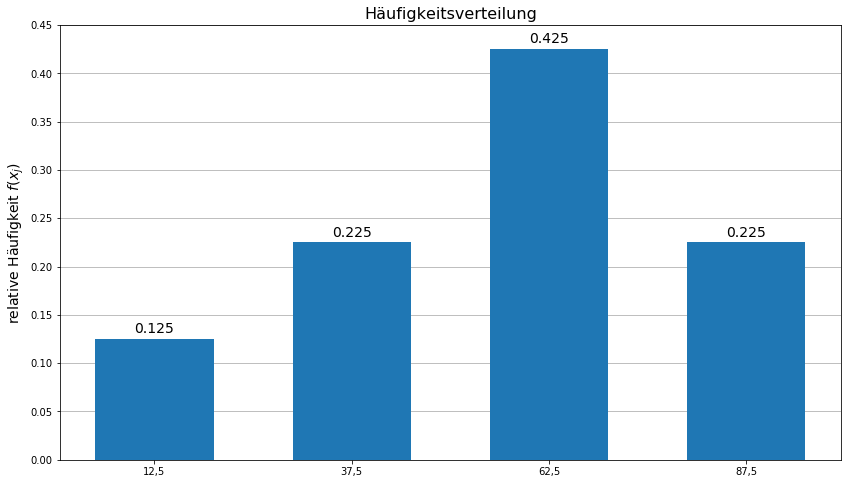

In [2]:
haeuf = {0: 0.125, 1: 0.225, 2: 0.425, 3: 0.225}
xlabels = ['12,5', '37,5', '62,5', '87,5']
x_values = list(haeuf.keys())
y_values = list(haeuf.values())

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=14)

fig, ax = plt.subplots(figsize=(14, 8))
rects = ax.bar(x=x_values, height=y_values, width=0.6)
ax.set_title('Häufigkeitsverteilung', size=16)
ax.set_ylabel('relative Häufigkeit $f(x_j)$', size=14)

#plt.xticks(x_values, xlabels)
ax.set_xticks(x_values)
ax.set_xticklabels(xlabels)

ax.set_axisbelow(True)

#plt.grid(True, axis='y')
ax.grid(True, axis='y')

#plt.ylim((0, 0.45))
ax.set_ylim(0, 0.45)

autolabel(rects)

plt.show()
toggle_code()

# Verteilungsfunktion

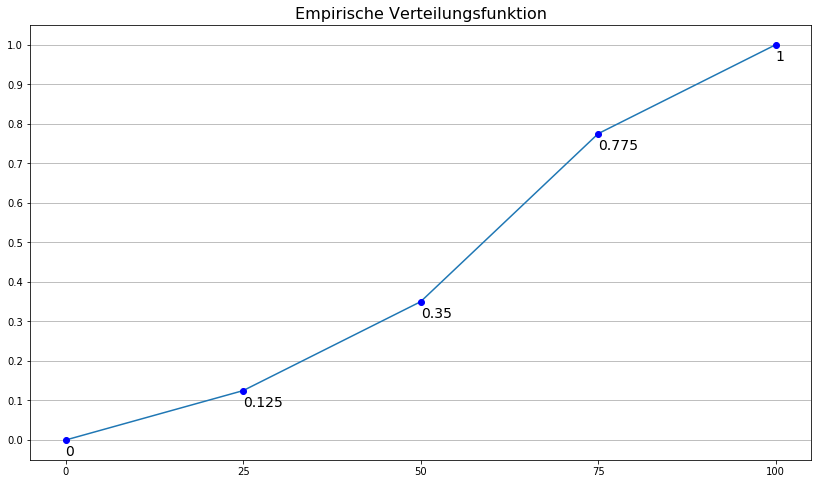

In [3]:
x_values = [0, 1, 2, 3, 4]
x_labels = [0, 25, 50, 75, 100]
y_values = [0, 0.125, 0.35, 0.775, 1]

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(x_values, y_values)
ax.plot(x_values, y_values, 'bo')
#plt.title('Empirische Verteilungsfunktion', size=16)
ax.set_title('Empirische Verteilungsfunktion', size=16)
#plt.grid(True, axis='y')
ax.grid(True, axis='y')
#plt.xticks(x_values, x_labels)
ax.set_xticks(x_values)
ax.set_xticklabels(x_labels)

## Wert neben Linie schreiben
for x, y in zip(x_values, y_values):
    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

major_ticks = np.arange(0, 1.1, 0.1)    
ax.set_yticks(major_ticks)
    
plt.show()
toggle_code()